In [1]:
library("qtl")
library("rhdf5")
library(RColorBrewer)
library("GenomicRanges")
# library("ggpubr")
library(ggplot2)
library("tidyverse")

devtools::load_all(path = "/users/rahul.pisupati/mygit/epiRqtl/")

options(warn=-1)
options(repr.plot.width=8, repr.plot.height=6)

Warning message:
“package ‘qtl’ was built under R version 3.6.3”
Warning message:
“package ‘RColorBrewer’ was built under R version 3.6.3”
Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, t

# HMM on the MAF filtered SNPs


Using SNPmatch

Once you have the MAF filtered SNPs. Use SNPmatch genotype_cross function to run HMM on the samples.

```
snpmatch genotype_cross -d /groups/nordborg/projects/field_experiments/007.pilot.sequencing/018.genotyping.by.plate/996.Swedes.220_6.newReSeq.July2020/002.mergeVCF/02_Swedes200_6.newReSeq_2.3M.BIALLELIC.hdf5 -e /groups/nordborg/projects/field_experiments/007.pilot.sequencing/018.genotyping.by.plate/996.Swedes.220_6.newReSeq.July2020/002.mergeVCF/02_Swedes200_6.newReSeq_2.3M.BIALLELIC.acc.hdf5  --hmm -i f2s_completeSet.maf_filtered.D1.vcf.gz  -p 6046x6191_reSeq -o genotyper_hmm_onlyD1.csv
```


# Genetic map from the SNP markers

In [2]:
home.fol = "~/"
data.fol = "/groups/nordborg/projects/epiclines/005.manu.crosses.2020/004.design_resolved/"
# data.fol = "/groups/nordborg/projects/epiclines/005.manu.crosses.2020/006.mapping_to_pacbio/003.mapped_to_6046/"
parents = c("6191", "6046")

# mapthis.d1 = read.cross("csvr", file.path(data.fol, "snps_bcftools"), "genotyper_hmm_onlyD1.csv", genotypes=c("0","1","2"), na.strings = c('-1', "NA"), estimate.map=FALSE)
# mapthis.d2 = read.cross("csvr", file.path(data.fol, "snps_bcftools"), "genotyper_hmm_onlyD2.csv", genotypes=c("0","1","2"), na.strings = c('-1', "NA"), estimate.map=FALSE)

In [3]:
mapthis.d1 = read.cross("csvr", file.path(data.fol, "snps_bcftools"), "genotyper_final_D1.csv", genotypes=c("AA","AB","BB"), na.strings = c('-1', "NA"), estimate.map=FALSE)
mapthis.d2 = read.cross("csvr", file.path(data.fol, "snps_bcftools"), "genotyper_final_D2.csv", genotypes=c("AA","AB","BB"), na.strings = c('-1', "NA"), estimate.map=FALSE)

 --Read the following data:
	 308  individuals
	 3299  markers
	 12  phenotypes
 --Cross type: f2 
 --Read the following data:
	 306  individuals
	 3299  markers
	 12  phenotypes
 --Cross type: f2 


## What fraction of markers are NA's and Remove duplicate markers

In [ ]:
## Duplicated markers
dup.d1 <- findDupMarkers(mapthis.d1, exact.only=F, adjacent.only = T)
dup.d2 <- findDupMarkers(mapthis.d2, exact.only=F, adjacent.only = T)

# mapthis.d1 = drop.markers(mapthis.d1, setdiff( markernames(mapthis.d1), union(names(dup.d1), names(dup.d2)) ) )
# mapthis.d2 = drop.markers(mapthis.d2, setdiff( markernames(mapthis.d2), union(names(dup.d1), names(dup.d2)) ) )

In [ ]:
mapthis.all = c(subset(mapthis.d1,  intersect(markernames(mapthis.d1), markernames(mapthis.d2)) ), subset(mapthis.d2,  intersect(markernames(mapthis.d1), markernames(mapthis.d2)) ))

mapthis.all = drop.markers( mapthis.all, findDupMarkers(mapthis.all, adjacent.only = T) )
mapthis.all = fill.geno(mapthis.all, method= "imp" )

In [7]:
mapthis.d1 = add_markers_to_cross( setdiff( markernames(mapthis.d2), markernames(mapthis.d1) ), mapthis.d1, fill.geno = T)
mapthis.d2 = add_markers_to_cross( setdiff( markernames(mapthis.d1), markernames(mapthis.d2) ), mapthis.d2, fill.geno = T )

In [31]:
summary(mapthis.d1)


summary(mapthis.d2)

    F2 intercross

    No. individuals:    310 

    No. phenotypes:     2 
    Percent phenotyped: 100 100 

    No. chromosomes:    5 
        Autosomes:      1 2 3 4 5 

    Total markers:      3299 
    No. markers:        785 580 632 521 781 
    Percent genotyped:  100 
    Genotypes (%):      AA:25.7  AB:50.3  BB:23.9  not BB:0.0  not AA:0.0 

    F2 intercross

    No. individuals:    306 

    No. phenotypes:     2 
    Percent phenotyped: 100 100 

    No. chromosomes:    5 
        Autosomes:      1 2 3 4 5 

    Total markers:      3299 
    No. markers:        785 580 632 521 781 
    Percent genotyped:  100 
    Genotypes (%):      AA:26.8  AB:50.7  BB:22.4  not BB:0.0  not AA:0.0 

In [22]:
# mapthis = subset(mapthis.all, ind = which(str_detect(getid(mapthis.all), "F2_D")) )
### I am skipping T16_P2 since SNPmatch isnt good on that one.
# mapthis = subset(mapthis.d1, ind = which(str_detect(getid(mapthis.d1), "F2_D1") ) )
# mapthis = subset(mapthis.d2, ind = which(str_detect(getid(mapthis.d2), "F2_D2") ) )
# mapthis = mapthis.d1

mapthis = subset(mapthis.all, ind = which(str_detect(getid(mapthis.all), "F2_D") ) )

In [10]:
mapthis = mapthis.d1

## Identify any segregation distortion patterns

Below plots and commands are used to identify if there is any segregation distortion.

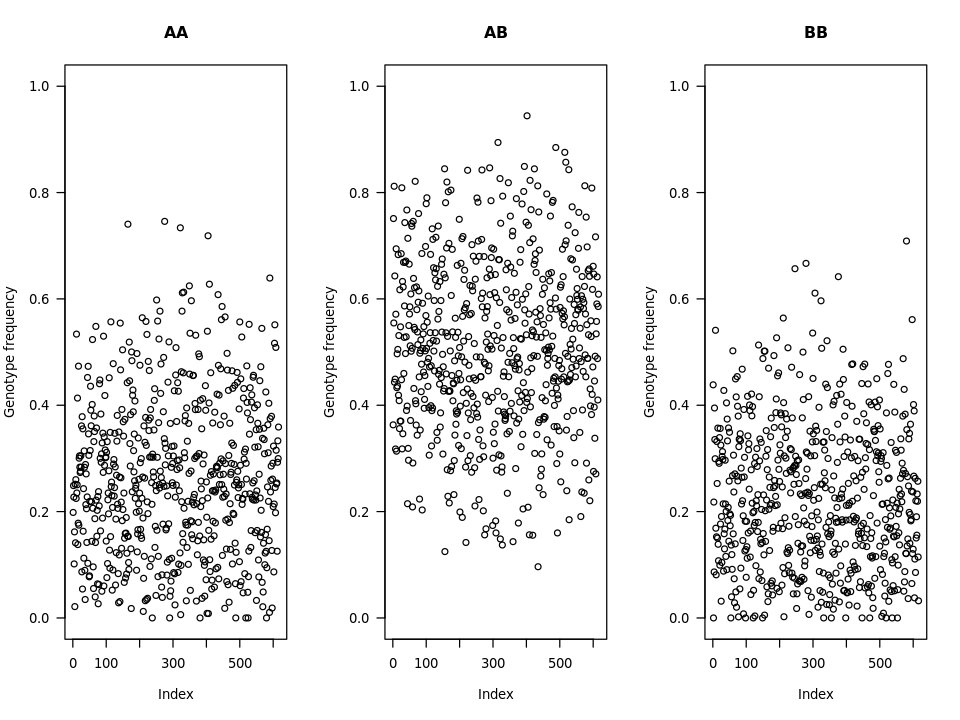

In [23]:
### Plot to check genotype frequencies
## Clear Segregation distortion ofir cross 6191x6045 \

g <- pull.geno(mapthis)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3)
  plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i],
       ylim=c(0,1))

# par(mar=rep(0.1,4), pty="s")
# triplot(labels=c("AA","AB","BB"))
# tripoints(gfreq, cex=0.8)
# tripoints(c(0.25, 0.5, 0.25), col="red", lwd=2, cex=1, pch=4)

## Check if there are any individuals that identical?

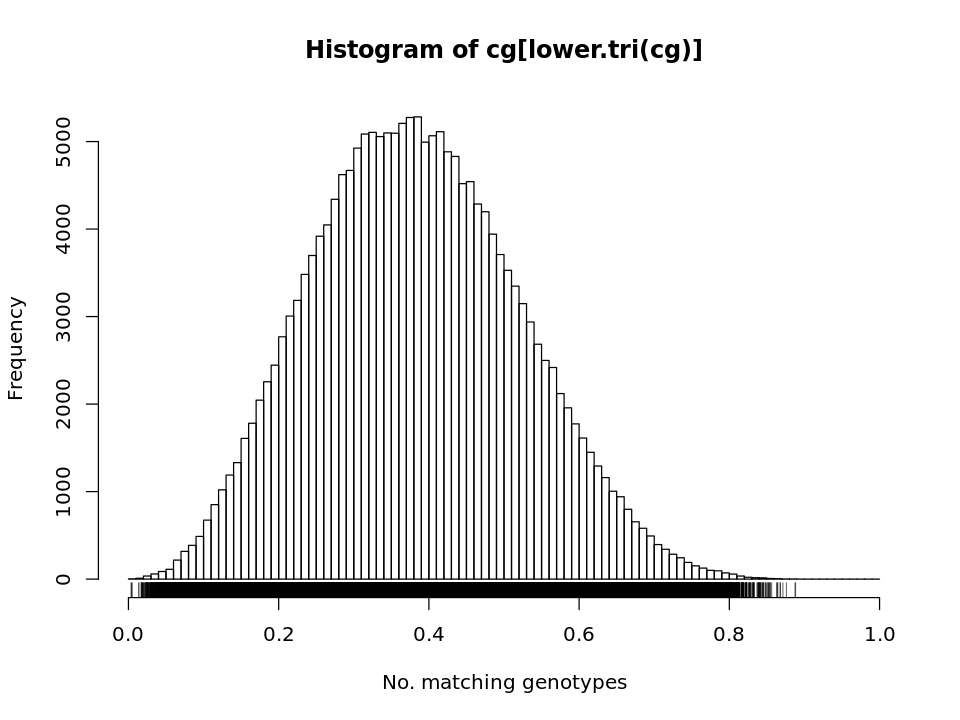

In [24]:
cg <- comparegeno(mapthis)
hist(cg[lower.tri(cg)], breaks=seq(0, 1, len=101), xlab="No. matching genotypes")
rug(cg[lower.tri(cg)])

## This looks good with not any pairwise individuals equal

In [25]:
cg <- comparegeno(mapthis)
wh <- which(cg > 0.95, arr=TRUE)  ## remove identical individuals

print( paste( "removed individuals:", length(table(wh[,2])) ) )
# getid(mapthis)[unique(wh[,2])]
mapthis = subset(mapthis, ind=-wh[,2])

[1] "removed individuals: 0"


ERROR: Error in subset.cross(mapthis, ind = -wh[, 2]): Must retain at least one individual.


In [26]:
## remove individuals that are parents
cg <- pull.geno(mapthis)
ap = numeric()
for (ef in seq(dim(cg)[1])){
    ef_g = table(cg[ef,])
    if ((length(ef_g) == 1) & (( names(ef_g) == '1' ) | (( names(ef_g) == '3' ))) ){
        ap = c(ap, ef )
    }
}
print(ap)
mapthis = subset(mapthis, ind=as.character(getid(mapthis)[-ap]))

numeric(0)


ERROR: Error in subset.cross(mapthis, ind = as.character(getid(mapthis)[-ap])): No matching individuals.


## Plot number of crossovers

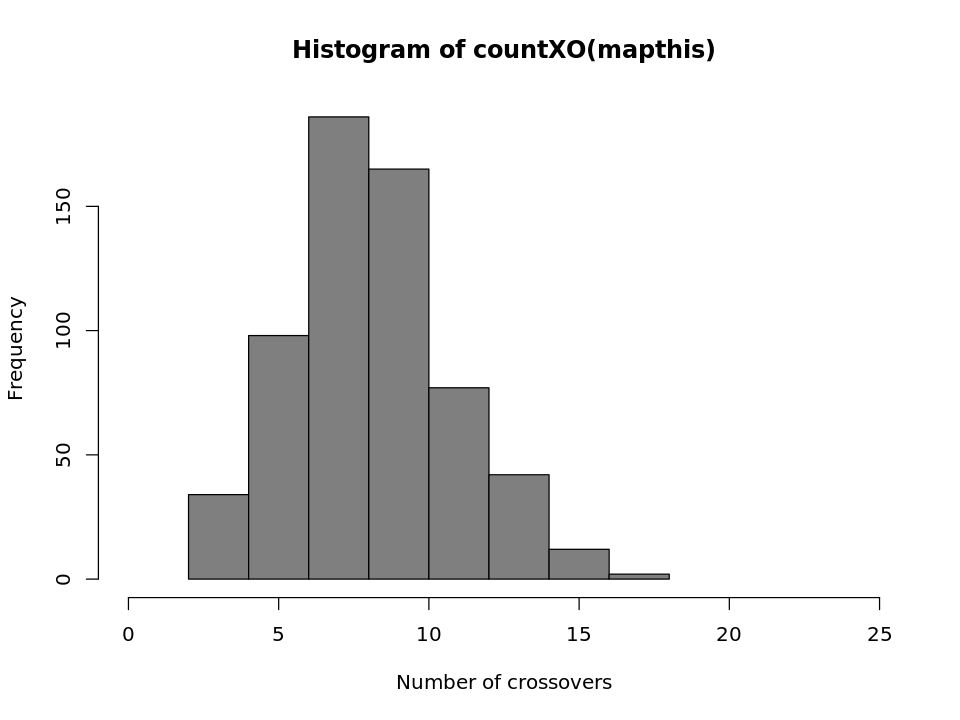

In [27]:
# png("num_xover.png")
# plot(countXO(mapthis), ylab="Number of crossovers")
hist(countXO(mapthis), xlab="Number of crossovers", breaks = 10, xlim = c(0, 25), col = "gray50")

# dev.off()

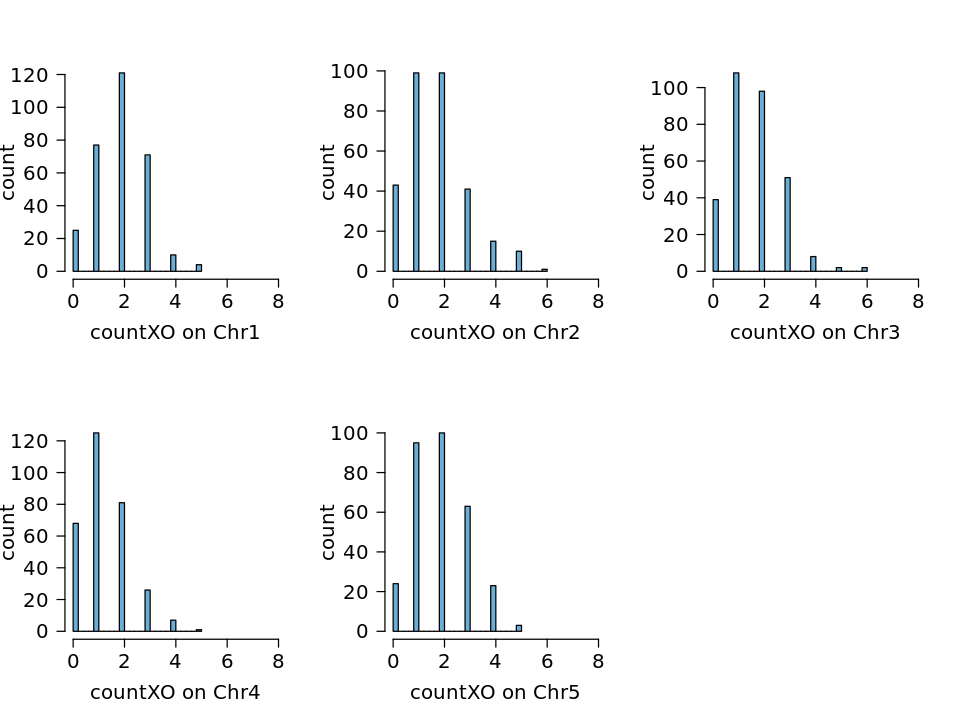

In [33]:
# png("countX0.png")
inds_with_more_xo = numeric()
# png("numxo.png")
par(mfrow=c(2,3), las=1)
for(i in 1:5){
    t_chr_xo = countXO(mapthis,chr = i)
    # inds_with_more_xo = c(inds_with_more_xo, which(as.numeric(t_chr_xo) > 6))
    hist(t_chr_xo, main = "", xlab = paste("countXO on Chr", i, sep = ""), col = "#6baed6", xlim = c(0, 8), breaks= 30, cex.axis = 1.5, cex.lab = 1.5, ylab = "count")
    # data_frame(x = as.numeric(t_chr_xo)) %>% ggplot(aes(x =x)) + geom_histogram() + my_ggtheme()
}
# dev.off()
# inds_with_more_xo = sort(inds_with_more_xo)
# print(inds_with_more_xo)
# mapthis= subset(mapthis, ind = as.character(getid(mapthis))[-inds_with_more_xo])

In [29]:
summary(mapthis)

    F2 intercross

    No. individuals:    613 

    No. phenotypes:     5 
    Percent phenotyped: 100 100 100 100 100 

    No. chromosomes:    5 
        Autosomes:      1 2 3 4 5 

    Total markers:      18596 
    No. markers:        3984 4542 2819 2961 4290 
    Percent genotyped:  100 
    Genotypes (%):      AA:26.4  AB:51.1  BB:22.5  not BB:0.0  not AA:0.0 

## Playing around with genetic map

In [30]:
mapthis = replace.map(mapthis, est.map(mapthis, verbose=TRUE, maxit = 100))

Chr 1:
  no. iterations = 5
  max rel've change at last step = 0.0000000
  loglik: -9979.4378

Chr 2:
  no. iterations = 5
  max rel've change at last step = 0.0000000
  loglik: -8264.1799

Chr 3:
  no. iterations = 5
  max rel've change at last step = 0.0000001
  loglik: -8114.6404

Chr 4:
  no. iterations = 4
  max rel've change at last step = 0.0000007
  loglik: -7056.0562

Chr 5:
  no. iterations = 4
  max rel've change at last step = 0.0000004
  loglik: -9776.2425



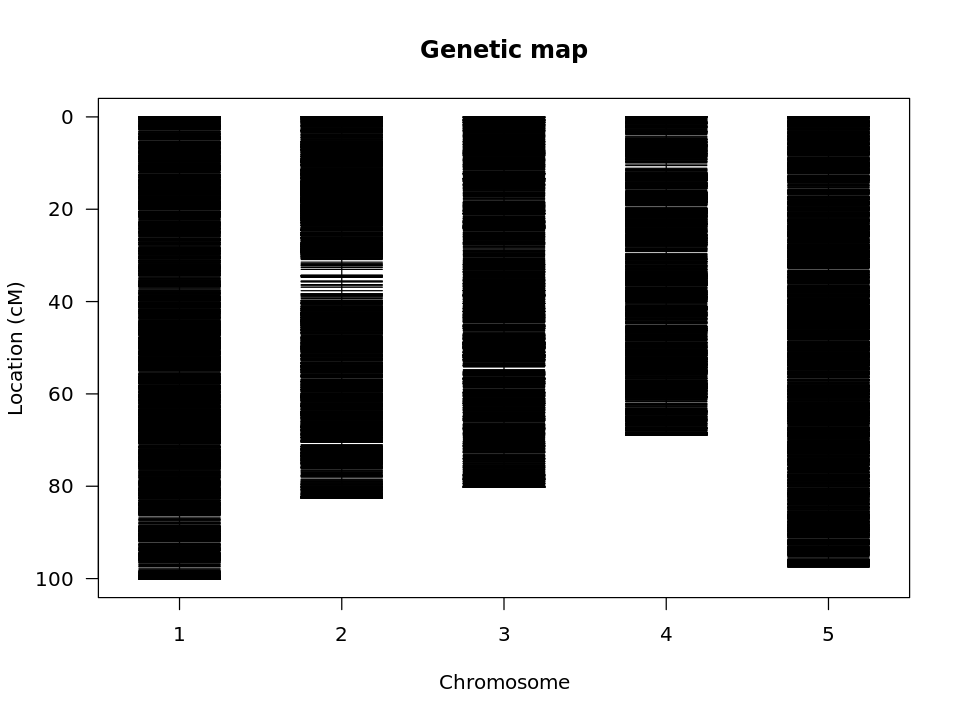

In [31]:
plotMap(mapthis)

In [26]:
messedup <- switch.order(mapthis, chr=2, c(1:30,60:120,31:60,121:134), error.prob=0.005)

# plotRF(messedup)

ERROR: Error in switch.order(mapthis, chr = 2, c(1:30, 60:120, 31:60, 121:134), : Incorrect number of markers.


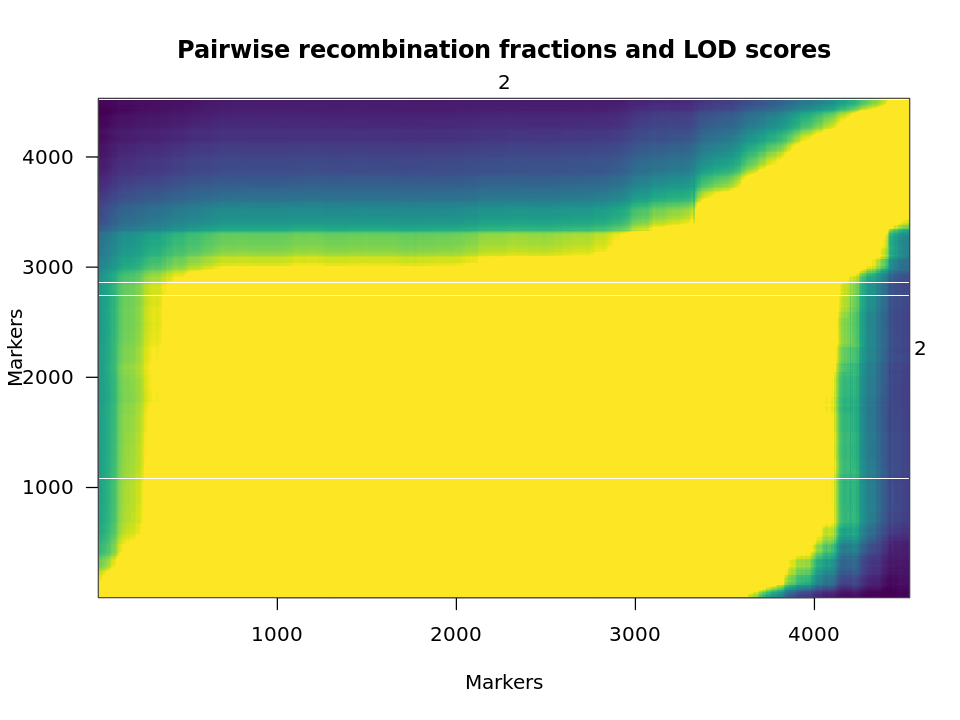

In [58]:
# plotMap(mapthis, chr = 1, show.marker.names=F)
plotRF(mapthis, chr = 2)

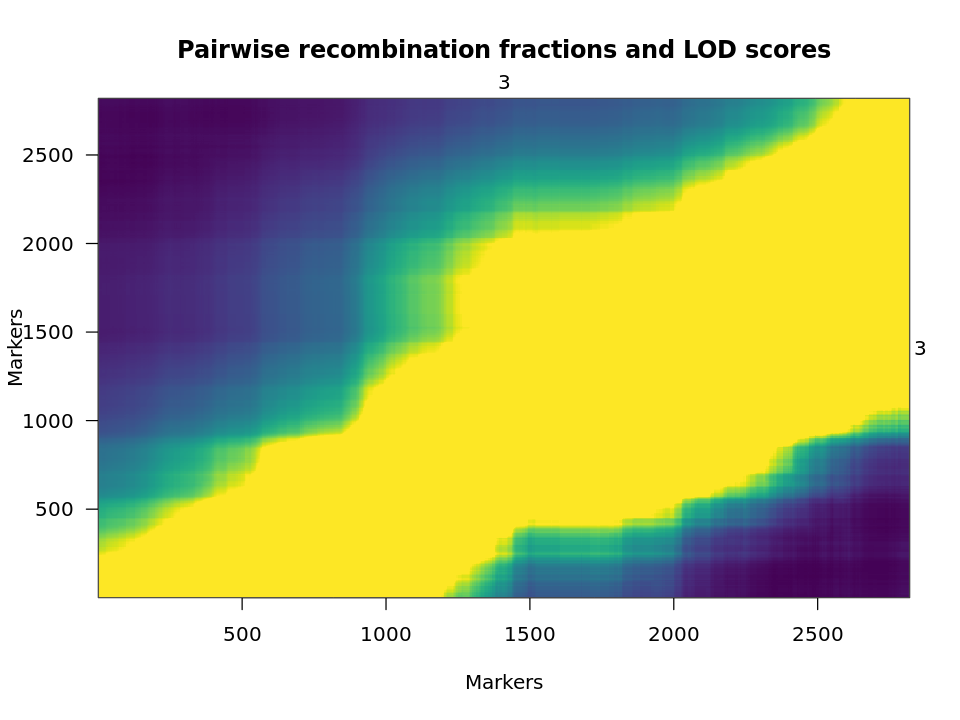

In [59]:
# plotMap(mapthis, chr = 1, show.marker.names=F)
plotRF(mapthis, chr = 3)

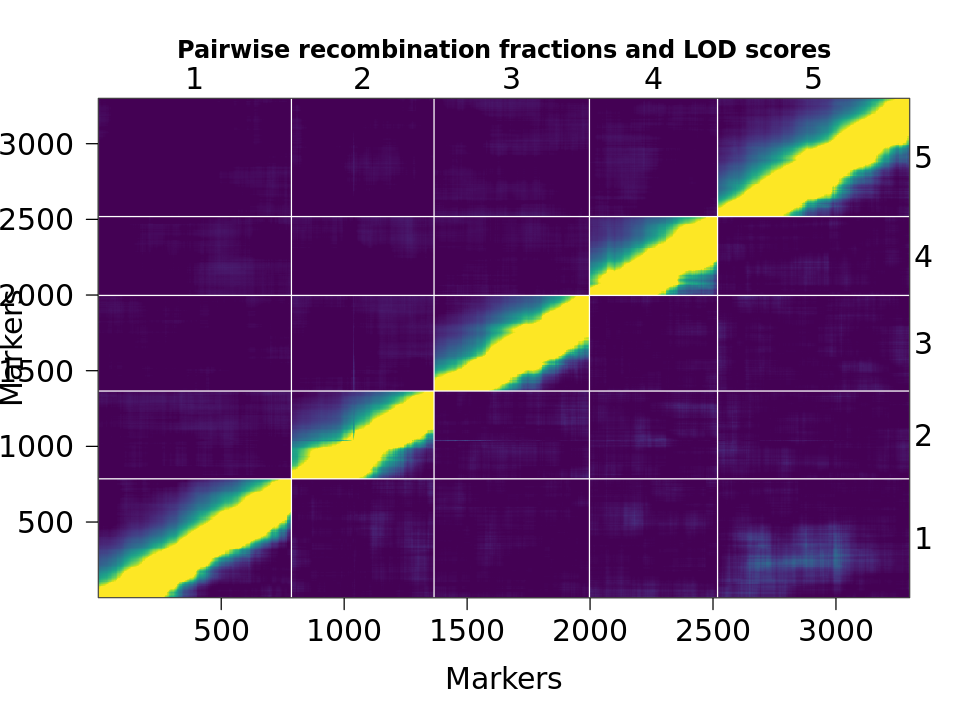

In [40]:
# plotMap(mapthis, chr = 1, show.marker.names=F)
par(cex.axis=1.5, cex.lab = 1.5)
plotRF(mapthis)


## Calculate genotype error frequencies.

In [52]:
mapthis = calc.genoprob(mapthis, step=1, err=0.001)
mapthis = sim.geno( mapthis )


In [59]:
loglik <- err <- c(0.001, 0.0025, 0.005, 0.0075, 0.01, 0.0125, 0.015, 0.0175, 0.02, 0.05)
for(i in seq(along=err)) {
    cat(i, "of", length(err), "\n")
    tempmap <- est.map(mapthis, error.prob=err[i])
    loglik[i] <- sum(sapply(tempmap, attr, "loglik"))
}
lod <- (loglik - max(loglik))/log(10)

In [ ]:
plot(err, lod, xlab="Genotyping error rate", xlim=c(0,0.05), ylab=expression(paste(log[10], " likelihood")))

In [61]:
mapthis = calc.errorlod(mapthis, error.prob=0.01)  #
# calc.genoprob(mapthis, step=1, err=0.001)

In [60]:
print(toperr <- top.errorlod(mapthis, cutoff=1))

ERROR: Error in top.errorlod(mapthis, cutoff = 1): You first need to run calc.errorlod.


In [29]:
plotGeno(mapthis, chr=1, ind=as.character(toperr$id[toperr$chr==1]), cutoff=1, include.xo=T)

ERROR: Error in plotGeno(mapthis, chr = 1, ind = as.character(toperr$id[toperr$chr == : object 'toperr' not found


In [49]:
mapthis.clean <- mapthis
for(i in 1:nrow(toperr)) {
    chr <- toperr$chr[i]
    id <- toperr$id[i]
    mar <- toperr$marker[i]
    mapthis.clean$geno[[chr]]$data[mapthis$pheno$id==id, mar] <- NA
}

In [50]:
mapthis.clean= fill.geno( mapthis.clean )

In [12]:
# which(getid(mapthis) == 'T16_P1.A1_F2_D1')
getid(mapthis)[1]

# i

[1] "T16_P1.A10_F2_D2"

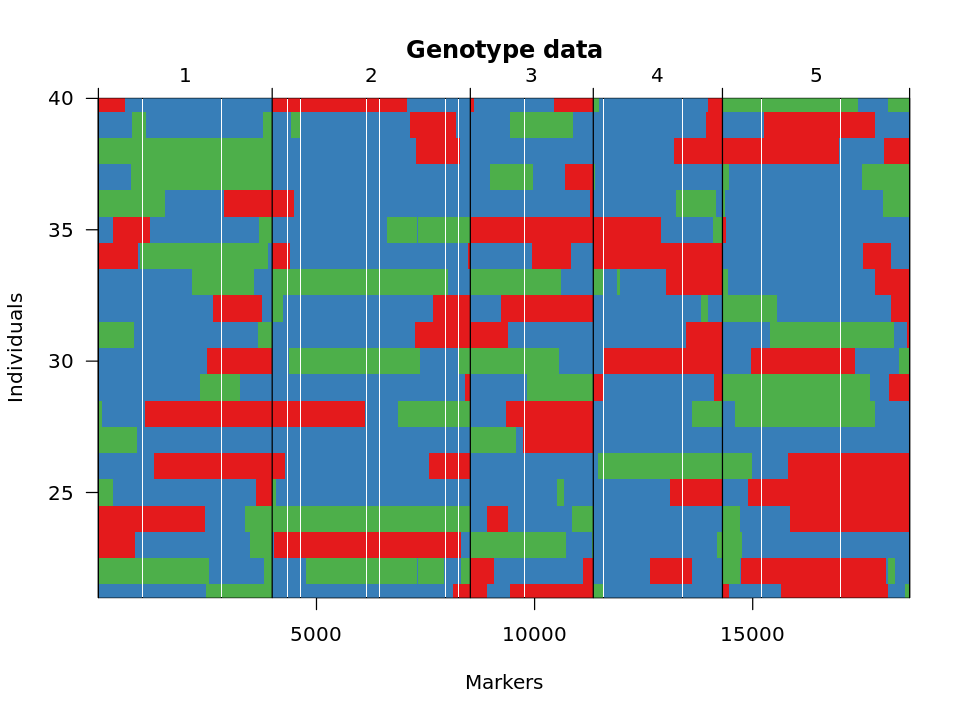

In [33]:
geno.image( mapthis, ylim = c(21, 40))

## Segregation distortion 

In [10]:
plot_genotype_freq_along_chrs = function(geno_unified, ylim = c(0, 8) ){
    gt <- qtl::geno.table(geno_unified, scanone.output=TRUE)
    gt_pval_thres = -log10( 0.05/qtl::totmar(geno_unified) )
    f2_colors = c("#d8b365", "#969696", "#5ab4ac")

    layout(matrix(1:2, ncol = 1), widths = 1, heights = c(2,2), respect = FALSE)
    par(mar = c(0, 4.1, 4.1, 2.1))
    plot(gt, ylab= expression(paste(-log[10], " P-value")), ylim = ylim, xlab = "", cex.lab = 1.2, cex.axis = 1.2 )
    abline(h = gt_pval_thres, lty=2, col="gray80")
    abline(h = -log10( 0.01/qtl::totmar(geno_unified) ), lty=2, col="gray20")
    legend("topleft", c("5%", "1%"), col = c("gray80", "gray20"), lty = c(2,2), ncol = 3, bty = "n")
    par(mar = c(4.1, 4.1, 0, 2.1))
    plot(gt, lod=3:5, ylab="Genotype frequency", ylim = c(0, 1), col = f2_colors, lwd = 3, cex.lab = 1.2, cex.axis = 1.2)
    abline(h=c(0.25, 0.5), lty=2, col="gray")
    legend("bottomleft", c("NN", "NS", "SS"), fill = f2_colors, ncol = 3, bty = "n")
    # par(mfrow=c(2,1), cex = 1.2, cex.lab = 1.2, lwd = 2, cex.axis = 1.2)
    # plot(gt, ylab= expression(paste(-log[10], " P-value")), ylim = c(0, 8))
    # abline(h = gt_pval_thres, lty=2, col="gray80")
    # abline(h = -log10( 0.01/qtl::totmar(geno_unified) ), lty=2, col="gray20")
    # legend("topleft", c("5%", "1%"), col = c("gray80", "gray20"), lty = c(2,2), ncol = 3, bty = "n")

    # plot(gt, lod=3:5, ylab="Genotype frequency", ylim = c(0, 1))
    # abline(h=c(0.25, 0.5), lty=2, col="gray")
    # legend("topleft", c("AA", "AB", "BB"), fill = c("black", 'blue', "red"), ncol = 3, bty = "n")
}

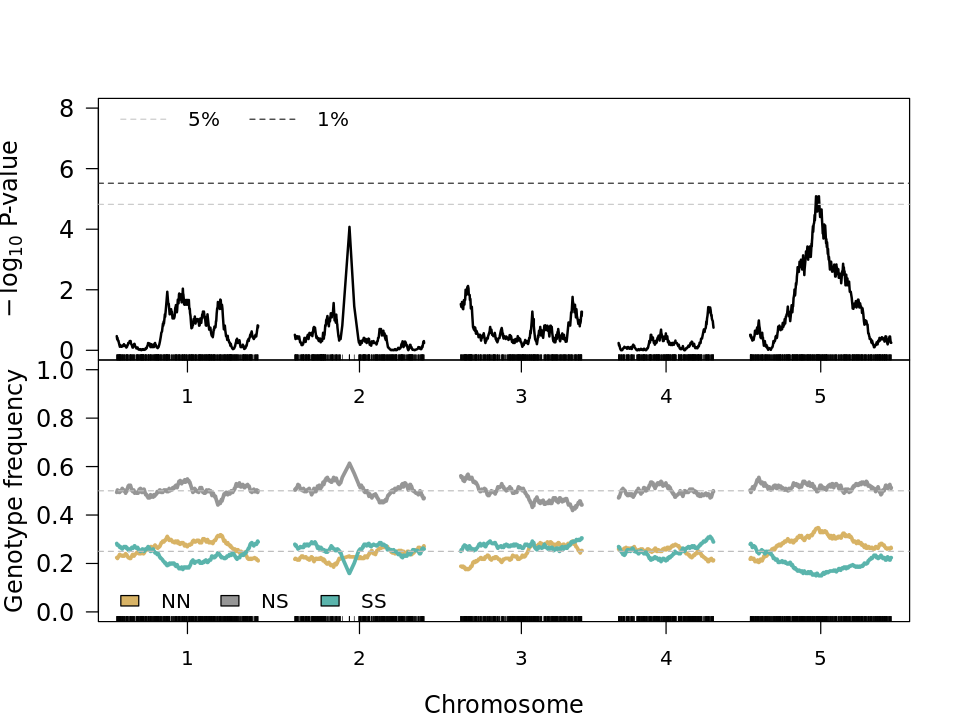

In [11]:
plot_genotype_freq_along_chrs(mapthis)

In [50]:
todrop <- rownames(gt[gt$neglog10P > -log10(0.01/totmar(mapthis)),])
# todrop

mapthis = drop.markers(mapthis, todrop[str_starts(todrop, "Chr2" )])
# mapthis <- drop.markers(mapthis, todrop)

In [54]:
summary(mapthis)

    F2 intercross

    No. individuals:    306 

    No. phenotypes:     2 
    Percent phenotyped: 100 100 

    No. chromosomes:    5 
        Autosomes:      1 2 3 4 5 

    Total markers:      3299 
    No. markers:        785 580 632 521 781 
    Percent genotyped:  100 
    Genotypes (%):      AA:26.8  AB:50.7  BB:22.4  not BB:0.0  not AA:0.0 

## Adding temperature, plate and direction in phenotypes based on Name


In [52]:
### 
add_metadata = function(cross_pheno_df){
    ### first column name is ID with file names
    cross_pheno_df = cross_pheno_df %>% mutate("direction" = str_remove( str_split_fixed(pull(cross_pheno_df, 'id'), "_", 3)[,3], pattern = "F2_" ) )
    cross_pheno_df = cross_pheno_df %>% mutate("temp" = str_split_fixed(pull(cross_pheno_df, 'id'), "_", 2)[,1] )
    cross_pheno_df = cross_pheno_df %>% mutate("plate" =  str_extract(pull(cross_pheno_df, 'id'), "_P[1-5]") )
    cross_pheno_df = cross_pheno_df %>% mutate("plate" =  str_remove(pull(cross_pheno_df, 'plate'), "_P"  ) )

    cross_pheno_df = cross_pheno_df %>% mutate("position" = str_split_fixed( str_split_fixed( pull(cross_pheno_df, "id"), "_", 3)[,2], "[.]", 2)[,2] )
    cross_pheno_df = cross_pheno_df %>% mutate( "row" =  str_sub(pull(cross_pheno_df, "position"), start = 1, end = 1) )
    cross_pheno_df = cross_pheno_df %>% mutate( "col" =  as.numeric(str_sub(pull(cross_pheno_df, "position"), start = 2, end = 3) ))
    cross_pheno_df = cross_pheno_df %>% mutate( "tray" = as.integer(pull(cross_pheno_df, "col") > 6) + 1 + (2 * (as.numeric(pull(cross_pheno_df, "plate")) - 1) ))
    cross_pheno_df = cross_pheno_df %>% unite( "temp_plate", c(temp, plate), sep = "_P", remove = F ) 
    cross_pheno_df = cross_pheno_df %>% unite( "temp_tray", c(temp, tray), sep = "_tray", remove = F ) 
    cross_pheno_df = cross_pheno_df %>% unite( "temp_direction", c(temp, direction), sep = "_", remove = F )
    cross_pheno_df = cross_pheno_df %>% unite( "d_tp", c(direction, temp_plate), sep = "_", remove = F )
    cross_pheno_df = cross_pheno_df %>% mutate("direction" =  str_remove(pull(cross_pheno_df, 'direction'), "D"  ) )
    cross_pheno_df = cross_pheno_df %>% mutate_at( c("plate","temp_plate", "temp_tray", "temp_direction", "d_tp"), as.factor) #%>% mutate_at( c("temp_plate", "temp_tray", "temp_direction", "d_top"), as.numeric) 
    cross_pheno_df = cross_pheno_df %>% mutate("temp" =  as.numeric(pull(cross_pheno_df, 'temp') == 'T16') + 1 )
#     cross_pheno_df = cross_pheno_df %>% mutate("temp" = as.numeric(str_split_fixed(pull(cross_pheno_df, 'id'), "_", 2)[,1] == "T16") + 1 )
    # # geno_unified$pheno = geno_unified$pheno %>% mutate("temp" = str_split_fixed(getid(geno_unified), "_", 2)[,1] ) 
    cross_pheno_df = cross_pheno_df %>% mutate_at( c("temp", "direction", "plate"), as.factor)    
    return(cross_pheno_df)
}

# cross_genotypes[['2020.all']]$pheno = add_metadata(cross_genotypes[['2020.all']]$pheno)
mapthis$pheno = add_metadata( mapthis$pheno['id'] )

# write.cross( cross_genotypes[["2020.d1.t16"]], format = "csvr", file.path(cross_genotypes[["2020.d1.fol"]], "snps_bcftools/genotyper_final_D1_T16.csv")  )

In [57]:
# write.cross(mapthis.clean, format = "csvr", file.path(data.fol, "snps_bcftools", "genotyper_final") )
write.cross(mapthis, format = "csvr", file.path(data.fol, "snps_bcftools", "genotyper_final_all") )

# Genetic map stats

In [19]:
home.fol = "~/"
data.fol = "/groups/nordborg/projects/epiclines/005.manu.crosses.2020/004.design_resolved/"
# data.fol = "/groups/nordborg/projects/epiclines/005.manu.crosses.2020/006.mapping_to_pacbio/003.mapped_to_6046/"
parents = c("6191", "6046")

final.d1 = read.cross("csvr", file.path(data.fol, "snps_bcftools"),  "genotyper_final_D1.csv", genotypes=c("AA","AB","BB"), na.strings = c('-1', "NA"), estimate.map=FALSE)
final.d2 = read.cross("csvr", file.path(data.fol, "snps_bcftools"),  "genotyper_final_D2.csv", genotypes=c("AA","AB","BB"), na.strings = c('-1', "NA"), estimate.map=FALSE)


final.d1.t16 = subset(final.d1, ind= str_which(getid(final.d1), "T16"))
final.d1.t4 = subset(final.d1, ind= str_which(getid(final.d1), "T4"))

 --Read the following data:
	 308  individuals
	 3299  markers
	 12  phenotypes
 --Cross type: f2 
 --Read the following data:
	 306  individuals
	 3299  markers
	 12  phenotypes
 --Cross type: f2 


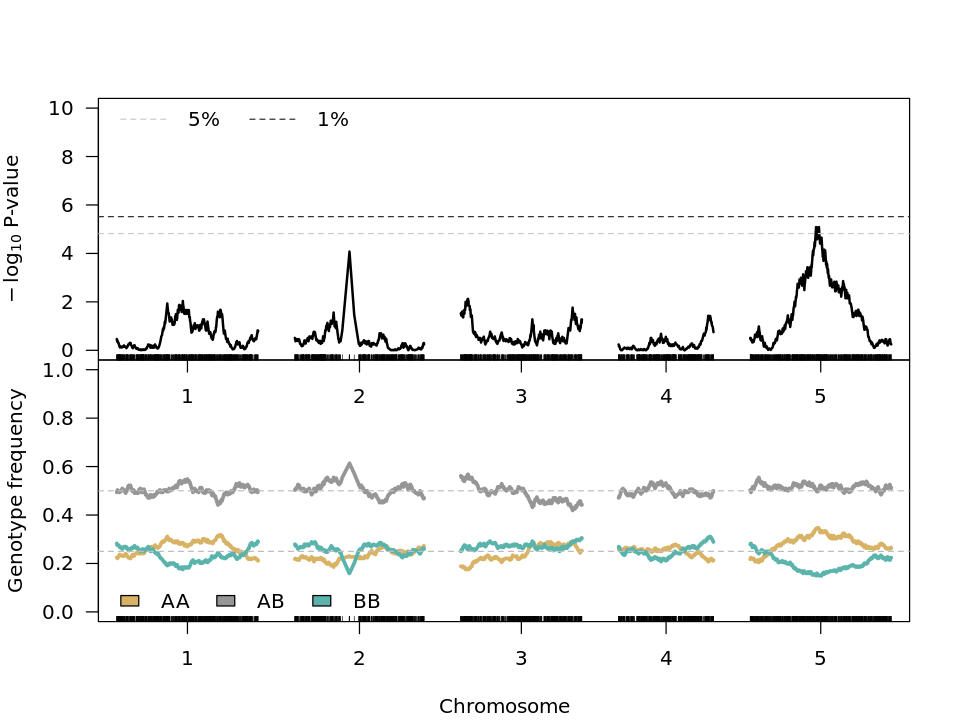

In [21]:
plot_genotype_freq_along_chrs( final.d1, ylim = c(0, 10) )

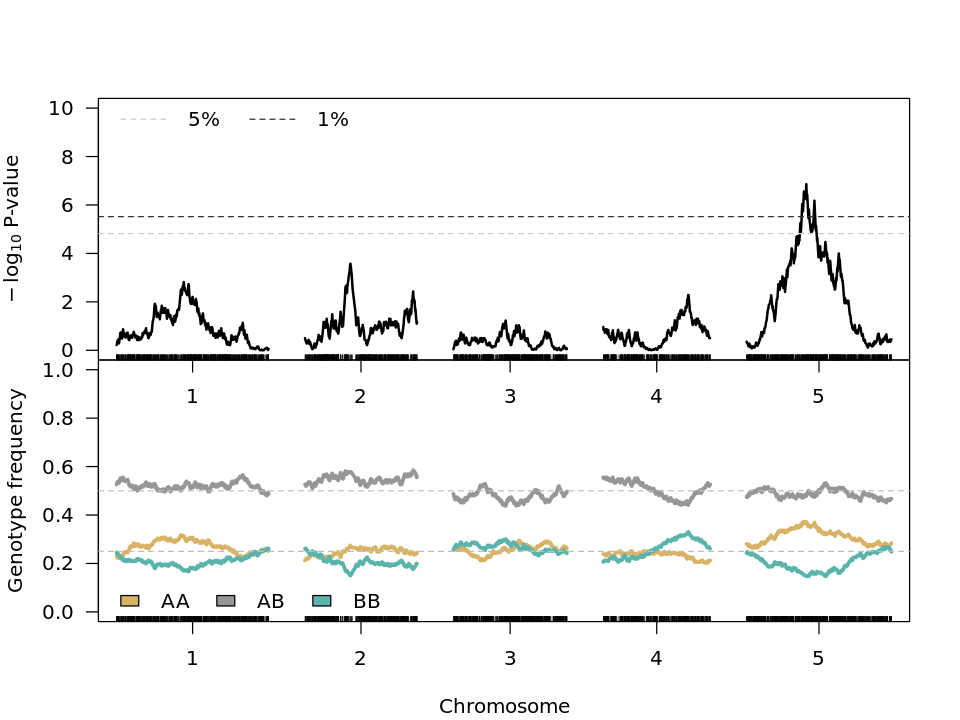

In [22]:
plot_genotype_freq_along_chrs( final.d2, ylim = c(0, 10) )

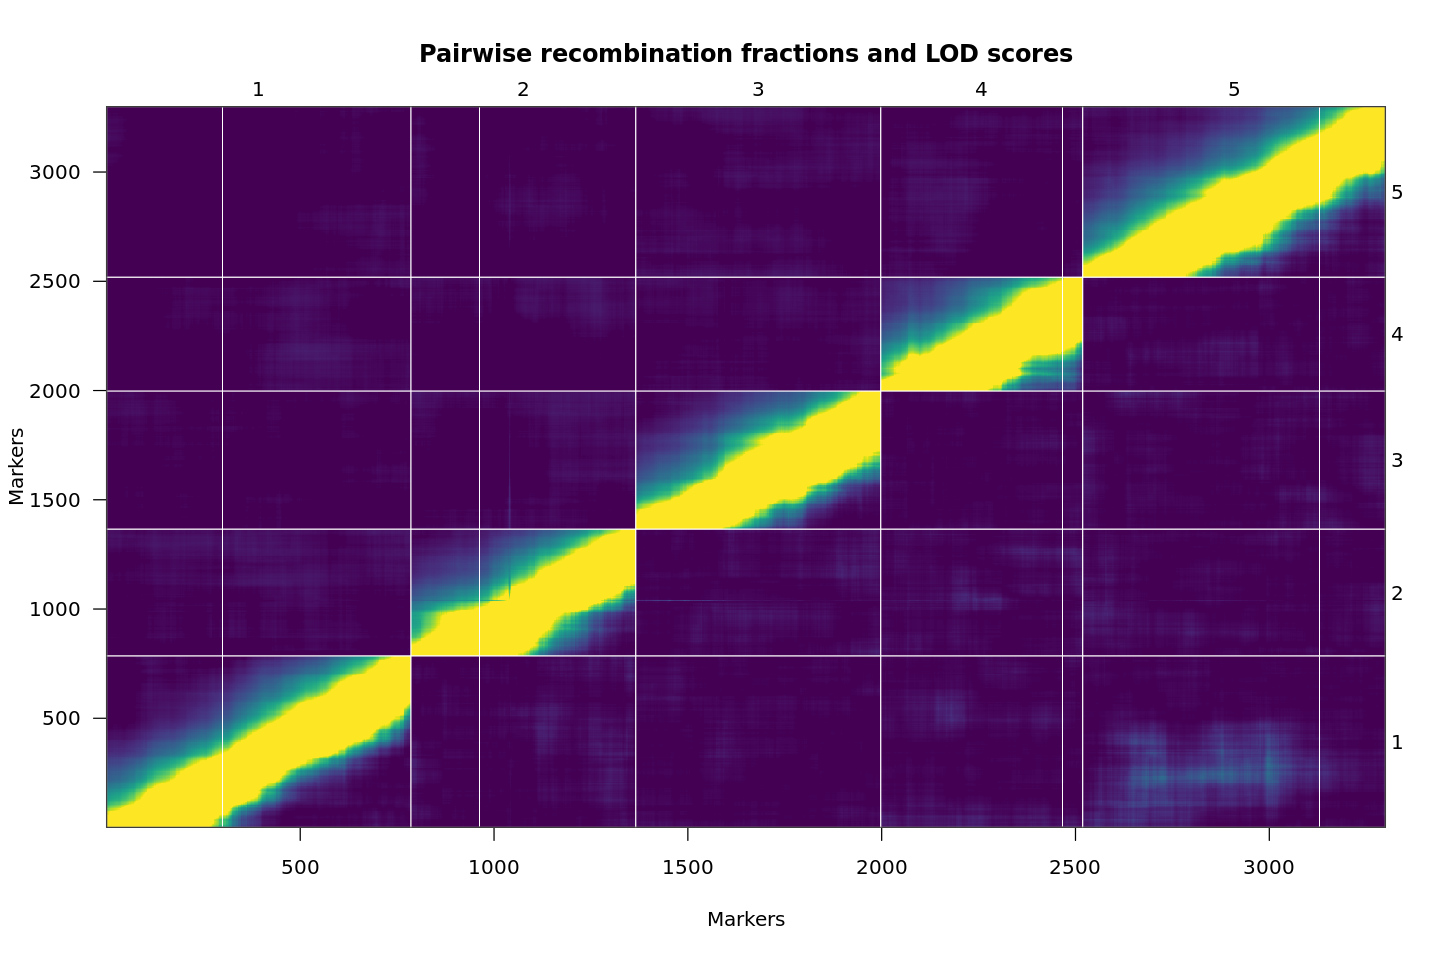

In [17]:
plotRF( final.d1 )

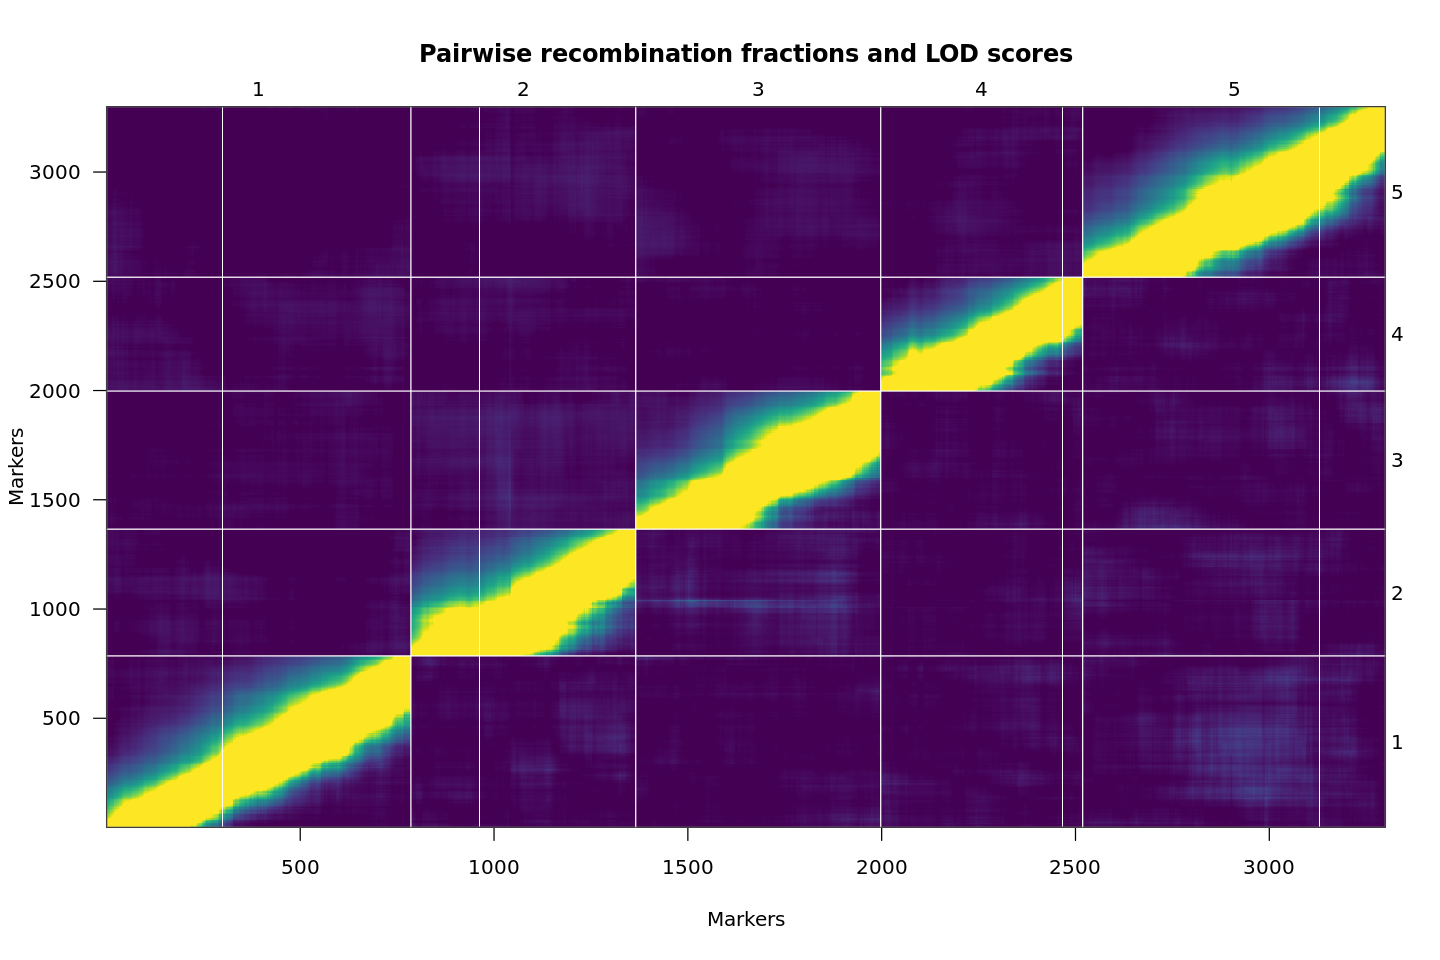

In [33]:
plotRF( final.d2 )

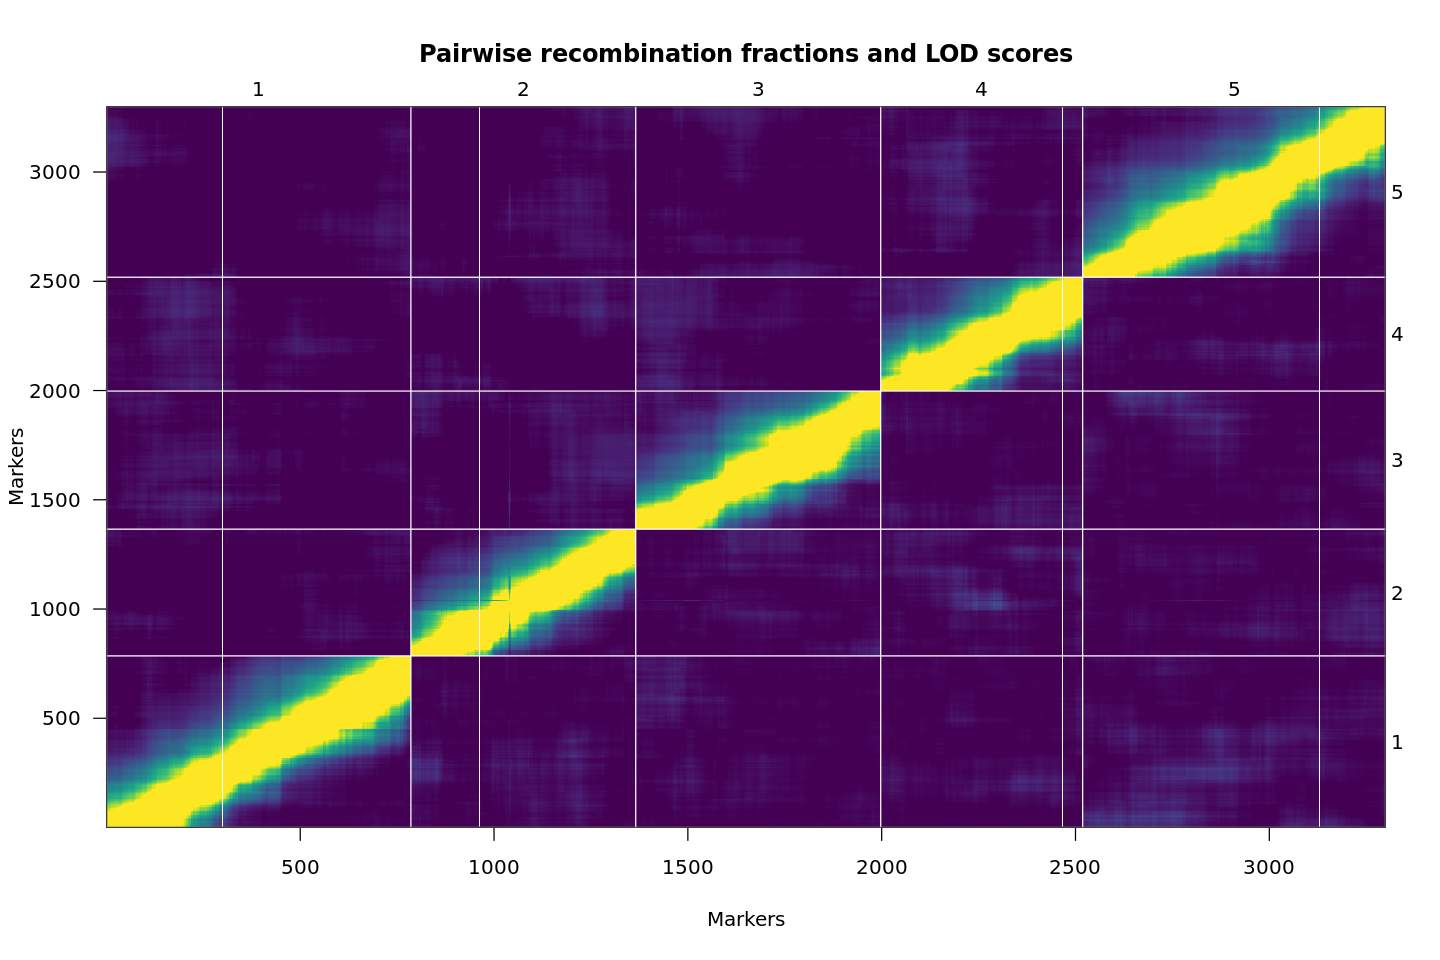

In [18]:
plotRF( final.d1.t16 )

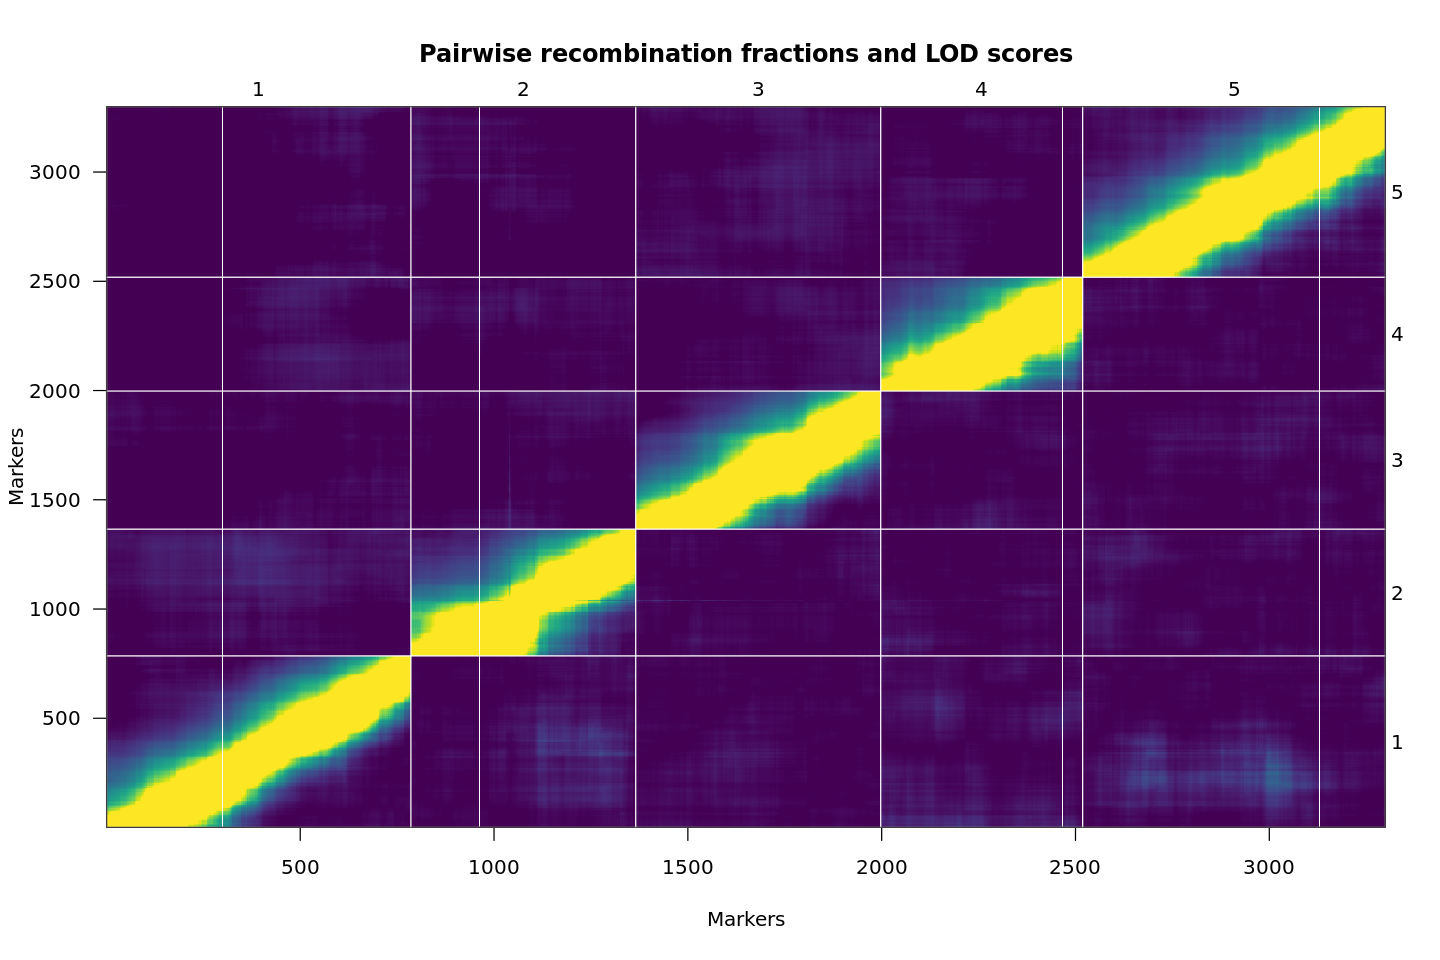

In [19]:
plotRF( final.d1.t4 )